(np.float64(-1.4008617749474424), np.float64(-1.237676294880945), np.float64(-0.689765797956417), np.float64(1.228140471950126), np.float64(11.237160966215388))


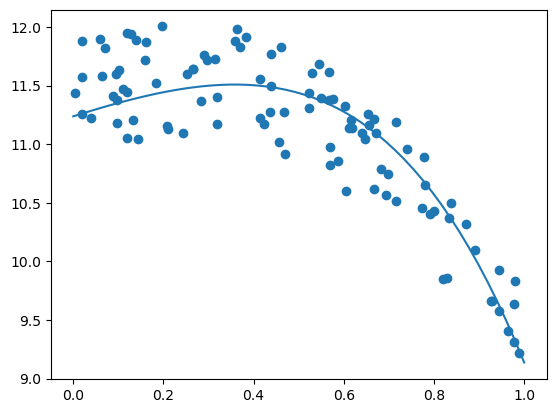

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.rand(100,1)
y = 3 * x**4 - 7 * x**3 + 2 * x**2 + 11 + np.random.rand(100,1)

# m0 x4 + m1 x3 + m2 x2 + m3 x + m4
def gd(x, y, m0=0, m1=0, m2=0, m3=0, m4=0, epoch=10000, learn=0.001):
    n = len(x)
    for i in range(epoch):
        y_n = m0 * x**4 + m1 * x**3 + m2 * x**2 + m3 * x + m4
        m4_l = - 2 / n * np.sum(y - y_n)
        m3_l = - 2 / n * np.sum((y - y_n) * x)
        m2_l = - 2 / n * np.sum((y - y_n) * x**2)
        m1_l = - 2 / n * np.sum((y - y_n) * x**3)
        m0_l = - 2 / n * np.sum((y - y_n) * x**4)

        m4 = m4 - learn * m4_l
        m3 = m3 - learn * m3_l
        m2 = m2 - learn * m2_l
        m1 = m1 - learn * m1_l
        m0 = m0 - learn * m0_l
    return m0, m1, m2, m3, m4

m0, m1, m2, m3, m4 = gd(x, y)
print(gd(x, y))
x_p = np.linspace(0, 1)

plt.plot(x_p, m0 * x_p**4 + m1 * x_p**3 + m2 * x_p**2 + m3 * x_p + m4)
plt.scatter(x,y)

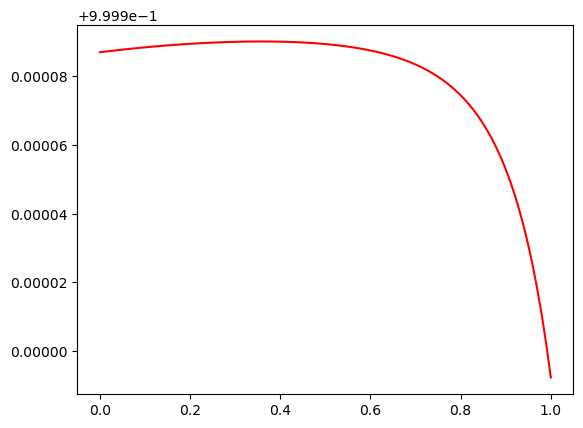

In [7]:
def logistic(z):
    return 1 / (1 + np.exp(-z))

def predict(x, m0, m1, m2, m3, m4, threshold=0.5):
    z = m0 * x**4 + m1 * x**3 + m2 * x**2 + m3 * x + m4
    return logistic(z)

x = np.linspace(0, 1, 100).reshape(-1, 1)
plt.plot(x, predict(x, m0, m1, m2, m3, m4), color='red')